<a href="https://colab.research.google.com/github/DILIPKRISHNA539/Time-Series-Forecasting/blob/main/Time_Series_Forecasting_with_ARIMA_and_SARIMA_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings("ignore")


In [ ]:
data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(data_url, parse_dates=['Month'], index_col='Month')
data.rename(columns={'Passengers': 'Passenger_Count'}, inplace=True)

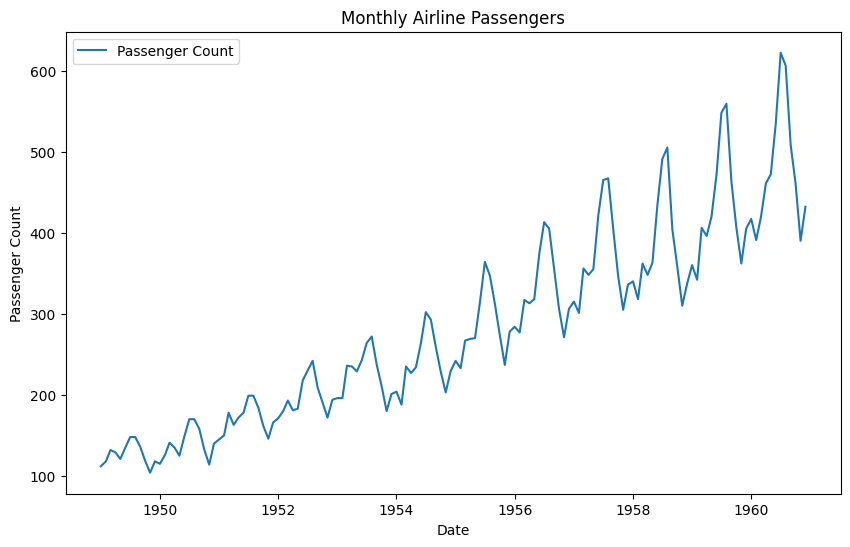

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data, label='Passenger Count')
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 640x480 with 0 Axes>

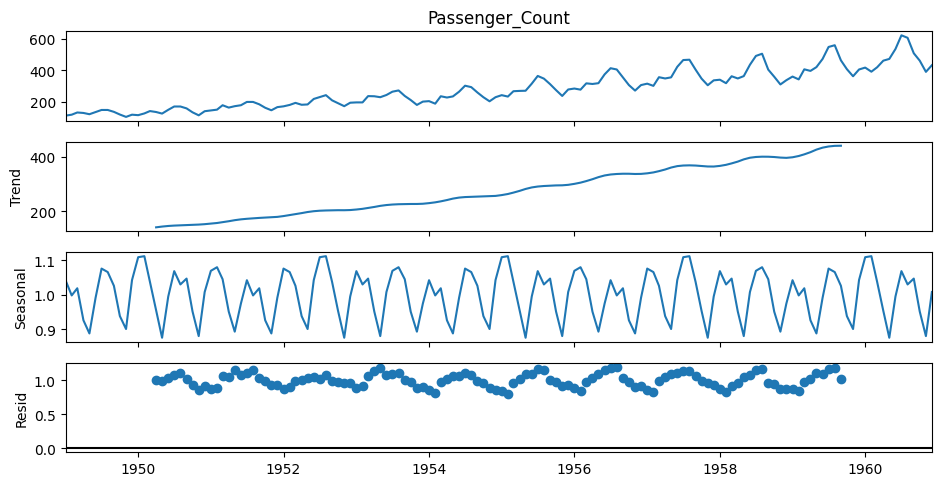

In [ ]:
result = seasonal_decompose(data["Passenger_Count"],
                            model='multiplicative', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10, 5)

In [ ]:
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The data is stationary.")
    else:
        print("The data is non-stationary.")

check_stationarity(data['Passenger_Count'])

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
The data is non-stationary.


In [ ]:
data['Differenced'] = data['Passenger_Count'].diff().dropna()
check_stationarity(data['Differenced'].dropna())

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478
The data is non-stationary.


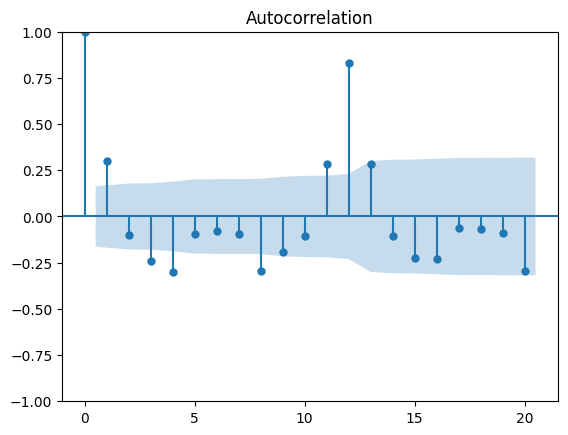

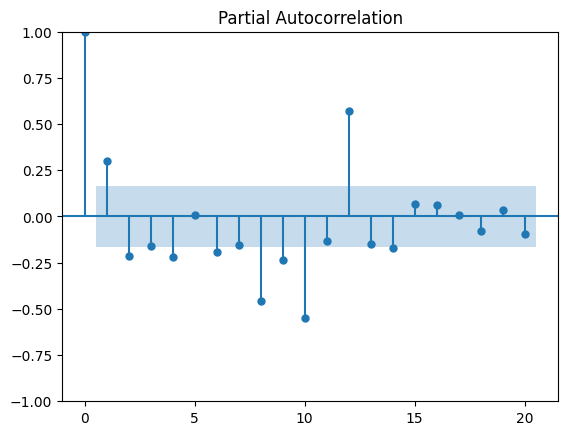

In [ ]:
plot_acf(data['Differenced'].dropna(), lags=20)
plot_pacf(data['Differenced'].dropna(), lags=20)
plt.show()

In [ ]:
arima_model = ARIMA(data['Passenger_Count'], order=(2, 1, 2))
arima_result = arima_model.fit()
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:        Passenger_Count   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Wed, 27 Nov 2024   AIC                           1353.347
Time:                        10:58:31   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.845      0.0

In [ ]:
sarima_model = SARIMAX(data['Passenger_Count'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()
print(sarima_result.summary())


                                      SARIMAX Results                                       
Dep. Variable:                      Passenger_Count   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -503.024
Date:                              Wed, 27 Nov 2024   AIC                           1020.048
Time:                                      10:58:36   BIC                           1040.174
Sample:                                  01-01-1949   HQIC                          1028.226
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4441      0.388      1.145      0.252      -0.316       1.204
ar.L2          0.32

In [ ]:
forecast_steps = 24
sarima_forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_ci = sarima_forecast.conf_int()

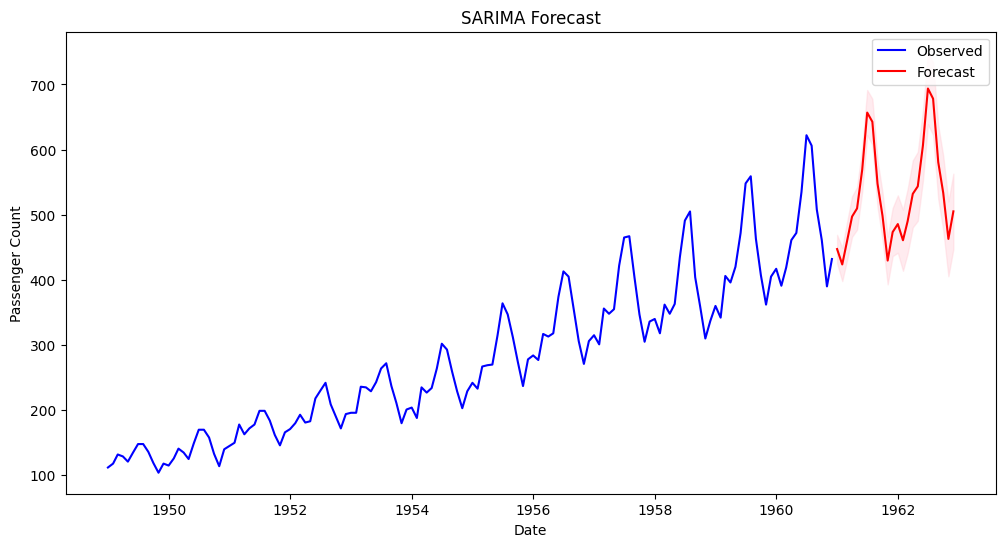

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Passenger_Count'], label='Observed', color='blue')
plt.plot(sarima_forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()

In [ ]:
train = data['Passenger_Count'][:100]
test = data['Passenger_Count'][100:]


In [ ]:
sarima_model_train = SARIMAX(train, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
sarima_result_train = sarima_model_train.fit()
sarima_forecast_test = sarima_result_train.forecast(steps=len(test))

In [ ]:
mae = mean_absolute_error(test, sarima_forecast_test)
rmse = np.sqrt(mean_squared_error(test, sarima_forecast_test))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 21.24316415658475
Root Mean Squared Error (RMSE): 25.95874673663466
